In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [31]:
df=pd.read_csv("wine_data.csv",header =None,usecols=[0,1,2])

In [32]:
df.columns=['Class labels','Alcohols','Malic Acid']

In [33]:
df

,Class labels,Alcohols,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohols', ylabel='Density'>

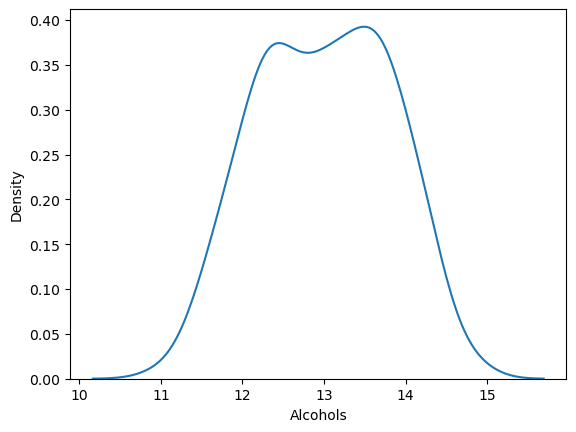

In [34]:
sns.kdeplot(df['Alcohols'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

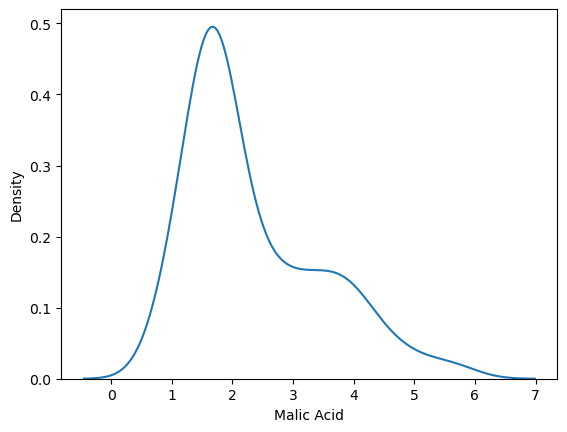

In [35]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohols', ylabel='Malic Acid'>

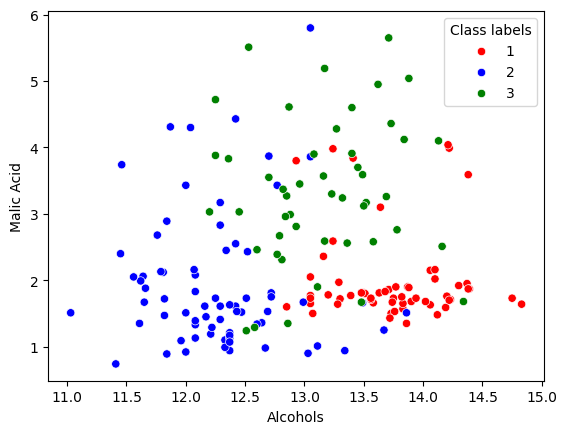

In [36]:
# color_dict={1:'red',3:'green',2:'blue'}
# sns.scatterplot(df['Alchols'],df["Malic Acid"],hue=df["Class labels"],palette=color_dict)

color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='Alcohols',y="Malic Acid",hue="Class labels",data=df,palette=color_dict)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class labels',axis=1),df['Class labels'],test_size=0.3,random_state=0)

In [38]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [39]:
# in normalization mainly uses min max 
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# Fit the scaler to the train set it will learn the parameters
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [41]:
np.round(X_train.describe(),1)

,Alcohols,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [42]:
np.round(X_train_scaled.describe(),1) # you see int this dataframe min both are o

,Alcohols,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


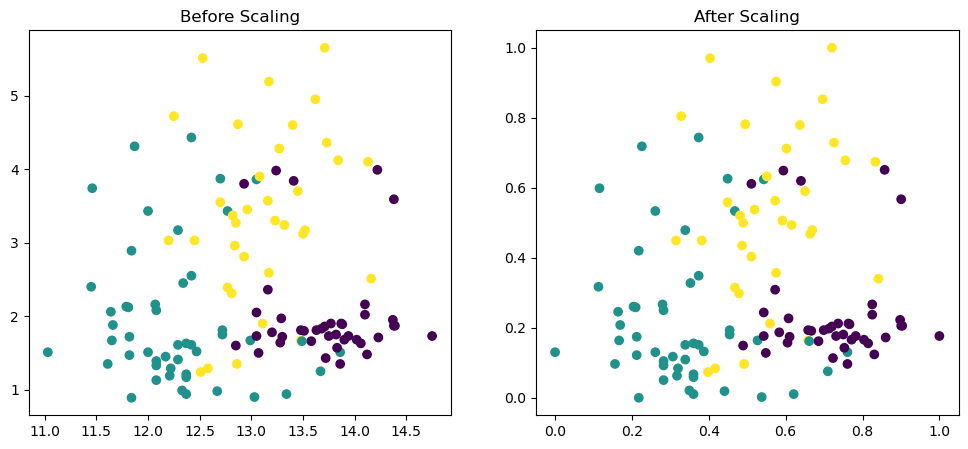

In [43]:
# no difference in plotting but only difference in scaling are change
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohols'], X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohols'], X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show() 

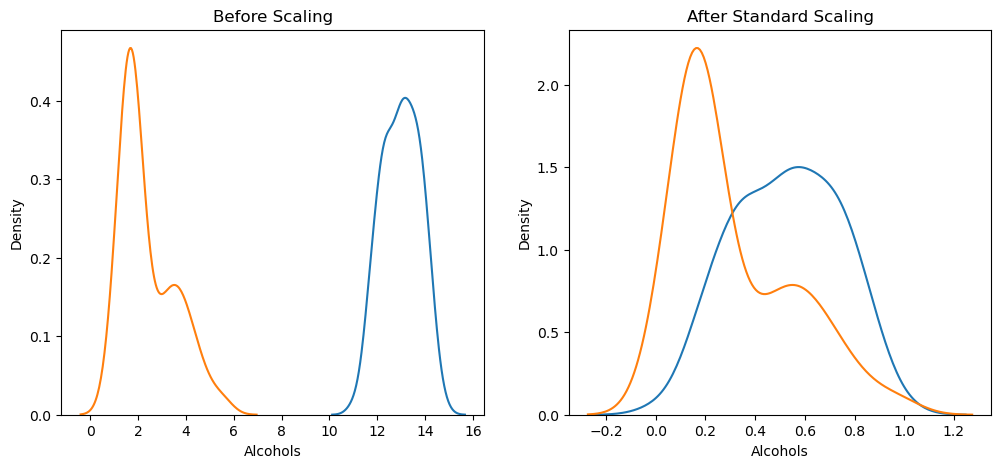

In [ ]:
#  you seeing big difference of scaling apply
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohols'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohols'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

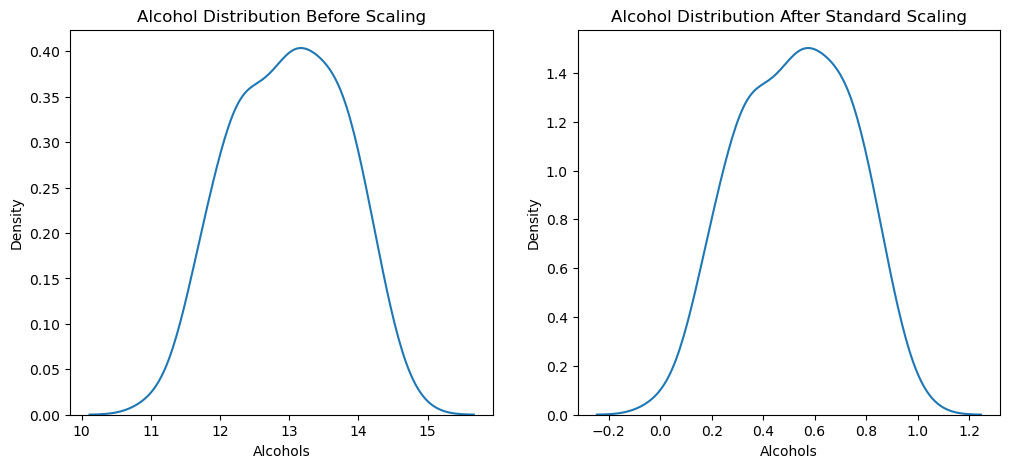

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohols'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohols'], ax=ax2)
plt.show()

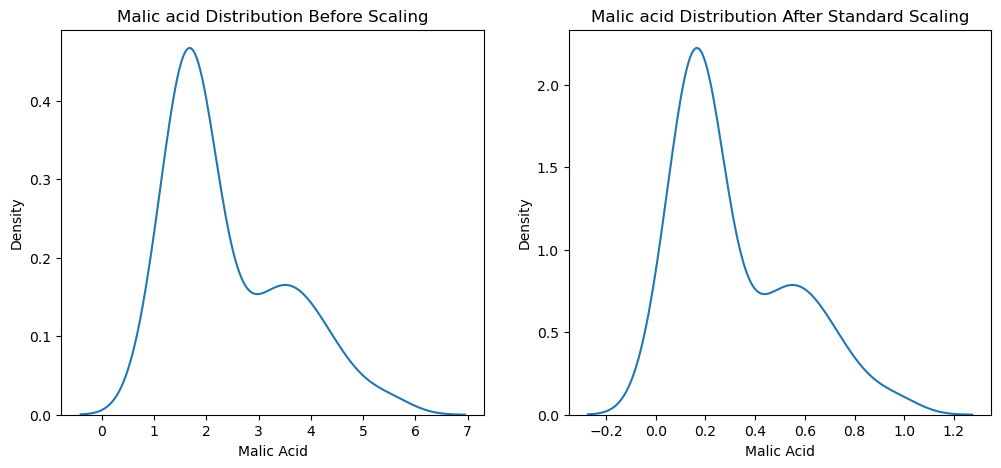

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()
